Back from holiday vacation and ready to finally get back to work! Oh, I have been looking forward to this!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')
print(df.shape)
df.head()#Wooowwww that is a lot of data... still not technically 'big data' but it's still
#a bit intimidating.

(1117957, 22)


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '')
df.columns

Index(['id', 'monsoonintensity', 'topographydrainage', 'rivermanagement',
       'deforestation', 'urbanization', 'climatechange', 'damsquality',
       'siltation', 'agriculturalpractices', 'encroachments',
       'ineffectivedisasterpreparedness', 'drainagesystems',
       'coastalvulnerability', 'landslides', 'watersheds',
       'deterioratinginfrastructure', 'populationscore', 'wetlandloss',
       'inadequateplanning', 'politicalfactors', 'floodprobability'],
      dtype='object')

In [4]:
#Hmm, is it sad that I'm already copying code I wrote? Regardless, I already like this approach...

for i in df.columns:
    if len(df[i].unique()) == df.shape[0]:
        df = df.drop([i], axis=1) #Not adding anything to our model... Hmm, now that I think about it, let's make this better:
        print(f"Just dropped {i} as it wasn't adding any value whatsoever to our model.")
    else:
        print(f"Well, {i} has {len(df[i].unique())} unique fields, so we'll keep it...for now!")

Just dropped id as it wasn't adding any value whatsoever to our model.
Well, monsoonintensity has 17 unique fields, so we'll keep it...for now!
Well, topographydrainage has 19 unique fields, so we'll keep it...for now!
Well, rivermanagement has 17 unique fields, so we'll keep it...for now!
Well, deforestation has 18 unique fields, so we'll keep it...for now!
Well, urbanization has 18 unique fields, so we'll keep it...for now!
Well, climatechange has 18 unique fields, so we'll keep it...for now!
Well, damsquality has 17 unique fields, so we'll keep it...for now!
Well, siltation has 17 unique fields, so we'll keep it...for now!
Well, agriculturalpractices has 17 unique fields, so we'll keep it...for now!
Well, encroachments has 19 unique fields, so we'll keep it...for now!
Well, ineffectivedisasterpreparedness has 17 unique fields, so we'll keep it...for now!
Well, drainagesystems has 18 unique fields, so we'll keep it...for now!
Well, coastalvulnerability has 18 unique fields, so we'll 

Flood probability should hopefully be bounded between 0 and 1, definitionally. The rest all flutter between one of 17-20 fields. Interestings... seems like they'll be some nice correlation going on. Then again, perhaps the fields are just relative to the scoring metric, akin to flodprobablity being bounded between 0 and 100. Let us continue.

Speaking of which, let me bring up the original data dictionary: Oh. At least on 5/1/24 I failed to find it. Will try to check in later.

In [5]:
if sum(df.isnull().sum())==0:
    print("Phew, no nulls.")
else:
    print(df.columns[df.isnull().any()])

Phew, no nulls.


In [6]:
df.dtypes #As expected given their distribution.

monsoonintensity                     int64
topographydrainage                   int64
rivermanagement                      int64
deforestation                        int64
urbanization                         int64
climatechange                        int64
damsquality                          int64
siltation                            int64
agriculturalpractices                int64
encroachments                        int64
ineffectivedisasterpreparedness      int64
drainagesystems                      int64
coastalvulnerability                 int64
landslides                           int64
watersheds                           int64
deterioratinginfrastructure          int64
populationscore                      int64
wetlandloss                          int64
inadequateplanning                   int64
politicalfactors                     int64
floodprobability                   float64
dtype: object

In [17]:
round(df.iloc[:, 0:8].describe(), 3)

,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation
count,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000
mean,4.921,4.927,4.955,4.942,4.943,4.934,4.956,4.928
std,2.056,2.094,2.072,2.052,2.083,2.058,2.083,2.066
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,3.000,4.000,4.000,3.000,3.000,4.000,3.000
50%,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
max,16.000,18.000,16.000,17.000,17.000,17.000,16.000,16.000


Realized I could just do describe on the df directly... regardless, we'll still look at it in chunks for pragmatics sake.

And, all 8 starters have a very close distribution: a median of 5 and a mean only slightly below that, technically making
their distrubtions skewed to the right. Minimums are all zeros and a bit of variance amount their first quartile; third remains the same, being only slightly larger than the median, with maximums varyng a bit.

In [19]:
round(df.iloc[:, 8:16].describe(), 3) #Same as above, obviously representing different features though.

,agriculturalpractices,encroachments,ineffectivedisasterpreparedness,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure
count,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000
mean,4.943,4.949,4.945,4.947,4.954,4.931,4.929,4.926
std,2.069,2.083,2.078,2.072,2.089,2.078,2.082,2.065
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,4.000,3.000,4.000,3.000,3.000,3.000,3.000
50%,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
max,16.000,18.000,16.000,17.000,17.000,16.000,16.000,17.000


In [18]:
round(df.iloc[:, 16:].describe(), 3)

,populationscore,wetlandloss,inadequateplanning,politicalfactors,floodprobability
count,1117957.000,1117957.000,1117957.000,1117957.000,1117957.000
mean,4.928,4.951,4.941,4.939,0.504
std,2.074,2.069,2.081,2.090,0.051
min,0.000,0.000,0.000,0.000,0.285
25%,3.000,4.000,3.000,3.000,0.470
50%,5.000,5.000,5.000,5.000,0.505
75%,6.000,6.000,6.000,6.000,0.540
max,18.000,19.000,16.000,16.000,0.725


Of final note to me is our target - flood probability. Interestngly it is also slightly skewed to the right, revolving around .504 and .505 for the different scale. Of interest to me are the extremes - .285 and .725 aren't terribly 'extreme' or far apart, I suppose implying a low kurttosis. Fitting with that theme would be the symetrical .035 probability from the median to eithr quartile.

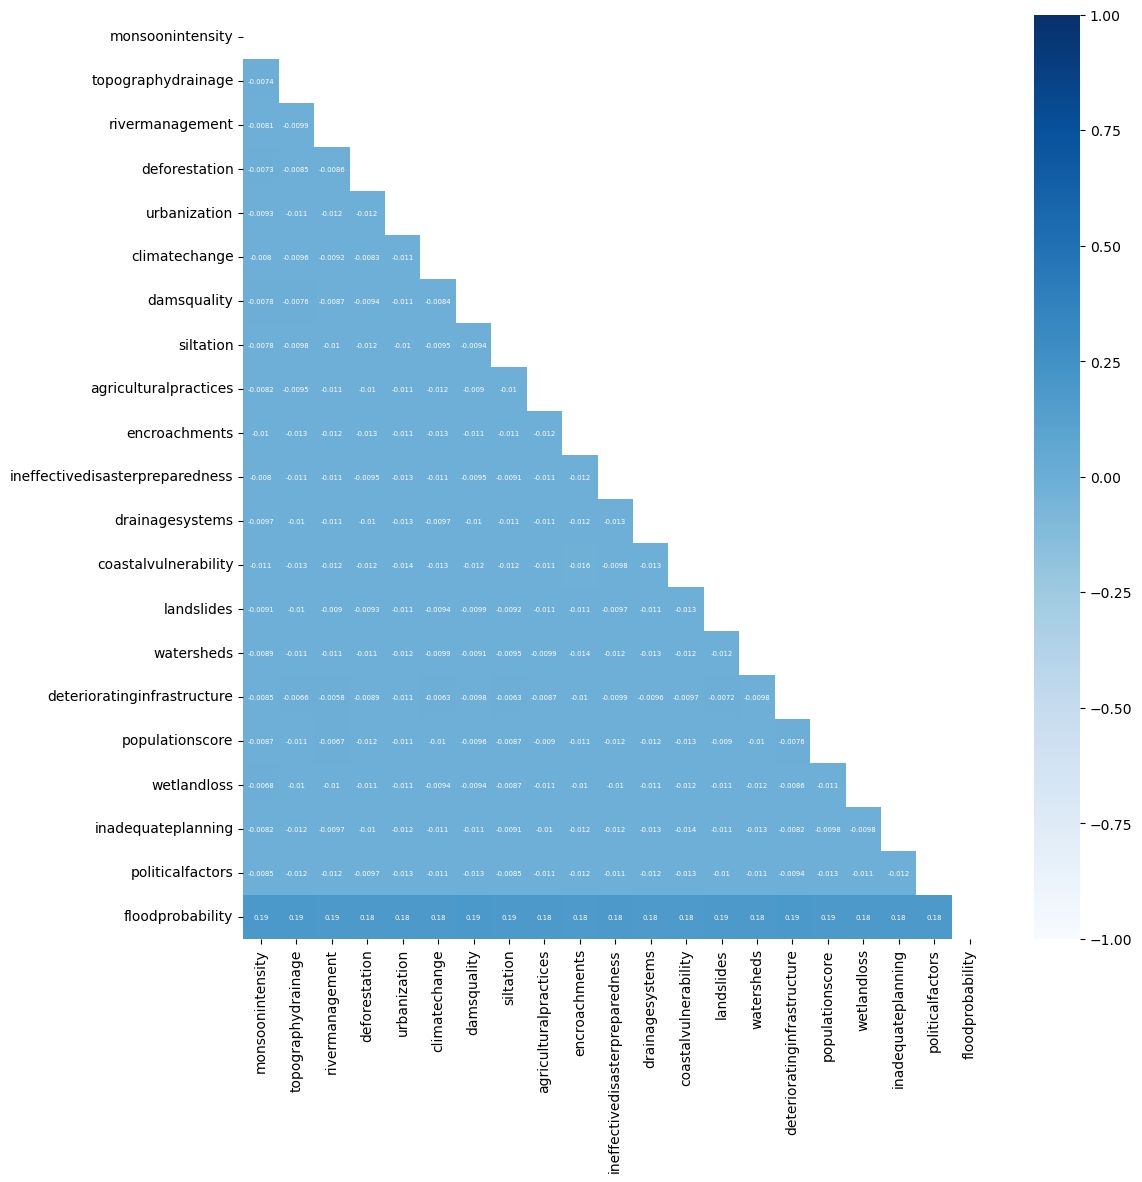

In [27]:
plt.figure(figsize=(12, 12))
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, vmin = -1, vmax = 1, cmap='Blues', annot_kws={'fontsize':5}); #Definitly should use blue considerng this dataset

Unfortunately they're all pretty ndependent wih each other. Furthermore, they are all rather weak with our target.

Hmm, I wonder if doing PCA will be a move later on? Regardless, we'll go with as is for now.

Given that at least at the present we haven't altered the data, I'll just retain the original and drop anew the id tag when running the model.

In [29]:
#A brief look at test on that topic:

df = pd.read_csv('../data/test.csv')
print(df.shape)

df.columns = df.columns.str.lower()

df.head()

(745305, 21)


,id,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality,siltation,agriculturalpractices,...,ineffectivedisasterpreparedness,drainagesystems,coastalvulnerability,landslides,watersheds,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [33]:
round(df.iloc[:, 0:8].describe(), 3)

,id,monsoonintensity,topographydrainage,rivermanagement,deforestation,urbanization,climatechange,damsquality
count,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000
mean,1490609.000,4.916,4.930,4.960,4.946,4.938,4.934,4.958
std,215151.166,2.056,2.094,2.072,2.053,2.082,2.059,2.089
min,1117957.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1304283.000,3.000,3.000,4.000,4.000,3.000,3.000,4.000
50%,1490609.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,1676935.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
max,1863261.000,16.000,17.000,16.000,17.000,17.000,17.000,16.000


In [34]:
round(df.iloc[:, 8:16].describe(), 3)

,siltation,agriculturalpractices,encroachments,ineffectivedisasterpreparedness,drainagesystems,coastalvulnerability,landslides,watersheds
count,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000,745305.000
mean,4.928,4.945,4.951,4.947,4.944,4.957,4.928,4.931
std,2.068,2.073,2.082,2.081,2.072,2.089,2.079,2.083
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,3.000,4.000,3.000,4.000,3.000,3.000,3.000
50%,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
max,16.000,16.000,17.000,16.000,17.000,17.000,16.000,16.000


In [32]:
round(df.iloc[:, 16:24].describe(), 3)#Hmm, a much greater wetlandloss... the max before was 16. On the topic populationscore
#was 18 and now 19, but eh... we'll just focus on wetlandloss for now.

,deterioratinginfrastructure,populationscore,wetlandloss,inadequateplanning,politicalfactors
count,745305.000,745305.000,745305.000,745305.000,745305.000
mean,4.926,4.927,4.948,4.940,4.944
std,2.066,2.074,2.066,2.079,2.087
min,0.000,0.000,0.000,0.000,0.000
25%,3.000,3.000,4.000,3.000,3.000
50%,5.000,5.000,5.000,5.000,5.000
75%,6.000,6.000,6.000,6.000,6.000
max,17.000,19.000,22.000,16.000,16.000


In [39]:
df[df['wetlandloss']>16]['wetlandloss'] #Eh, just four.... won't worry about it. Plus this factor might not matter that much...

388544    17
530164    22
629531    17
695830    18
Name: wetlandloss, dtype: int64